In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
n0=200
n1=200

mu=[0,0]
sigma=np.matrix([[0.9,-0.4],[-0.4,0.3]])

x0=np.random.multivariate_normal([2.5,2.5],sigma,n0)
x1=np.random.multivariate_normal([1.,1.],sigma,n1)
x0=np.asmatrix(x0)
x1=np.asmatrix(x1)

In [3]:
print(x0.shape)
print(x1.shape)

(200, 2)
(200, 2)


In [4]:
mu0=np.mean(x0,axis=0)
mu1=np.mean(x1,axis=0)
print(mu0)
print(mu1)
print(mu1-mu0)
print(x0-mu0)
print(np.mean(x0-mu0,axis=0))
print(np.mean(x1-mu1,axis=0))

[[2.49544563 2.49437984]]
[[1.03168584 0.97799958]]
[[-1.4637598  -1.51638027]]
[[ 0.2700932   0.58486719]
 [-1.20173605  0.98692765]
 [ 0.65101916 -0.03715763]
 [ 0.31072129 -0.14098784]
 [-1.39073371  0.69974697]
 [ 1.18563912 -0.65219951]
 [ 1.02923435 -1.16152904]
 [ 1.1505128  -1.07849708]
 [ 0.04808177  0.10537534]
 [-0.15833016 -0.01338592]
 [-1.00995545  0.60598092]
 [ 0.03408138 -0.04468609]
 [ 0.15355453  0.47991772]
 [-0.53512213  0.35038113]
 [ 0.81783436 -0.06053453]
 [-1.75118411  0.53509149]
 [ 0.39610562  0.1421169 ]
 [ 0.84514834 -0.68021471]
 [ 0.72576997 -0.02699758]
 [ 0.90842968 -1.21919573]
 [ 0.53221721  0.30300829]
 [-1.98155392  0.41884998]
 [ 1.52794471 -1.17100762]
 [ 0.78866433 -0.17463731]
 [-0.08056006  0.2281217 ]
 [-1.12456387  0.07227067]
 [ 1.15291474 -0.72292635]
 [-1.44882158  0.37158353]
 [-1.18907854  1.0789906 ]
 [-0.62486551  0.35516928]
 [-0.16041957  0.0952642 ]
 [-0.93046011  0.35145828]
 [ 1.06936463 -0.40836719]
 [ 0.14162781  0.43040821]
 [

In [68]:
import cvxpy as cvx 

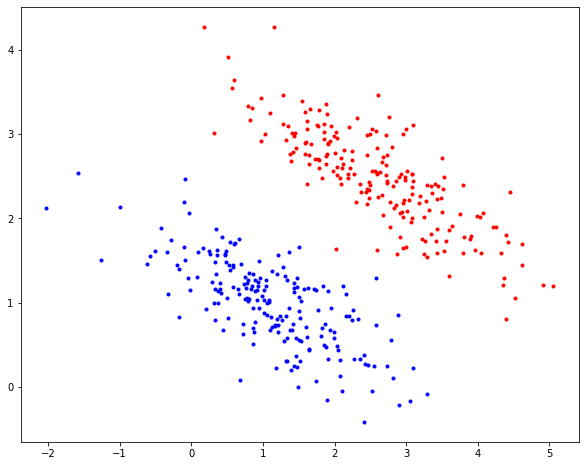

In [7]:
plt.figure(figsize=(10,8))
plt.plot(x0[:,0],x0[:,1],'r.')
plt.plot(x1[:,0],x1[:,1],'b.')
plt.show()

In [5]:
S0=(1./(x0.shape[0]-1))*(x0-mu0).T*(x0-mu0)
print((x0-mu0).T*(x0-mu0))
S1=(1./(x1.shape[0]-1))*(x1-mu1).T*(x1-mu1)


#S0=np.asmatrix(S0)
#S1=np.asmatrix(S1)
print(S0)
print(S1)
w=np.array([[2],[3]])
print(w.T*(n0*S0+n1*S1)*w)

[[157.96169443 -67.18642985]
 [-67.18642985  53.61288633]]
[[ 0.79377736 -0.33762025]
 [-0.33762025  0.26941149]]
[[ 0.88093763 -0.42432905]
 [-0.42432905  0.31129654]]
[[556.36813034]]


In [90]:
w=cvx.Variable(2,1)
print(cvx.quad_form(w,n0*S0+n1*S1))
objective=(mu0-mu1)*w/(cvx.quad_form(w,n0*S0+n1*S1))
obj=cvx.Maximize(objective)
prob=cvx.Problem(obj)
result=prob.solve()


0 + 421.1898140463546 * quad_over_lin([[-0.15099062 -0.28477034]
 [-0.88349286  0.46844462]] * var14, 1)


DCPError: Can only divide by a scalar constant.

In [91]:
cvx.quad_form?

In [6]:
from sklearn import discriminant_analysis

In [7]:
X=np.vstack([x0,x1])
y=np.vstack([np.zeros((n0,1)),np.ones((n1,1))])
print(X.shape)
print(y.shape)

(400, 2)
(400, 1)


In [8]:

clf=discriminant_analysis.LinearDiscriminantAnalysis()
clf.fit(X,np.ravel(y))

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [9]:
w=clf.coef_
bias=clf.intercept_
print(w,bias)
proj_w=(n0*S0 + n1*S1).I*(mu0 - mu1).T
print((n0*S0 + n1*S1).I)
print(proj_w.shape)
print(proj_w)

[[-10.23295301 -18.64922013]] [50.42506936]
[[0.00740786 0.00971989]
 [0.00971989 0.02136368]]
(2, 1)
[[0.02558238]
 [0.04662305]]


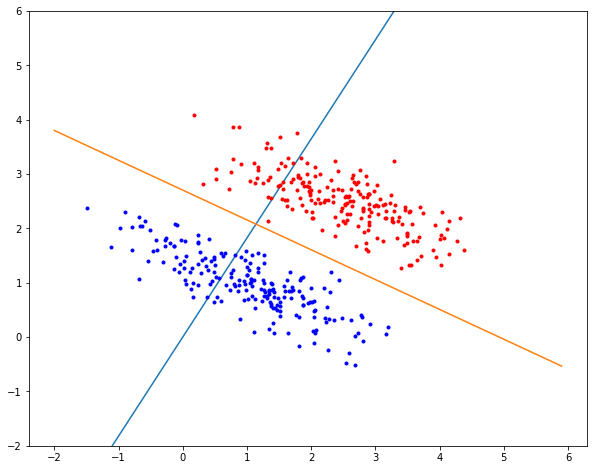

In [14]:
xp=np.arange(-2,6,0.1)
yp=proj_w[1,0]/proj_w[0,0]*xp
proj=-w[0,0]/w[0,1]*xp-bias[0]/w[0,1]
plt.figure(figsize=(10,8))
plt.plot(xp,yp)
plt.plot(xp,proj)
plt.plot(x0[:,0],x0[:,1],'r.')
plt.plot(x1[:,0],x1[:,1],'b.')
plt.ylim([-2, 6])

plt.show()

In [ ]:
x0=np.random.multivariate_normal([2.5,2.5],sigma,n0).T
x1=np.random.multivariate_normal([1.,1.],sigma,n1).T
x0=np.asmatrix(x0)
x1=np.asmatrix(x1)